In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import rcParams
import numpy as np
import pandas as pd
from scipy.io import loadmat

rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "Arial"
mpl.rcParams['figure.dpi']= 300
plt.rcParams['font.size'] = 8
sns.set(font="Arial", style = 'white')
from matplotlib import font_manager
from scipy.stats import permutation_test
# sorted(font_manager.get_font_names())
import joblib

In [10]:
X = np.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/feature_D1.npy')
X2 = np.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/feature_D2.npy')
X3 = np.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/feature_D3.npy')
Y = np.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/obs_D1.npy')
Y2 = np.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/obs_D2.npy')
Y3 = np.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/obs_D3.npy')
cv_pred_d1 = np.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/cv_pred_d1.npy')
model = joblib.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/model_D1.pkl')
x_all = np.concatenate([X,X2,X3])
y_all = np.concatenate([Y,Y2,Y3])

/home/lxm/.conda/envs/mine39/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SelectKBest from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/lxm/.conda/envs/mine39/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RobustScaler from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/lxm/.conda/envs/mine39/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ElasticNet from version 1.3.0 when using version 1

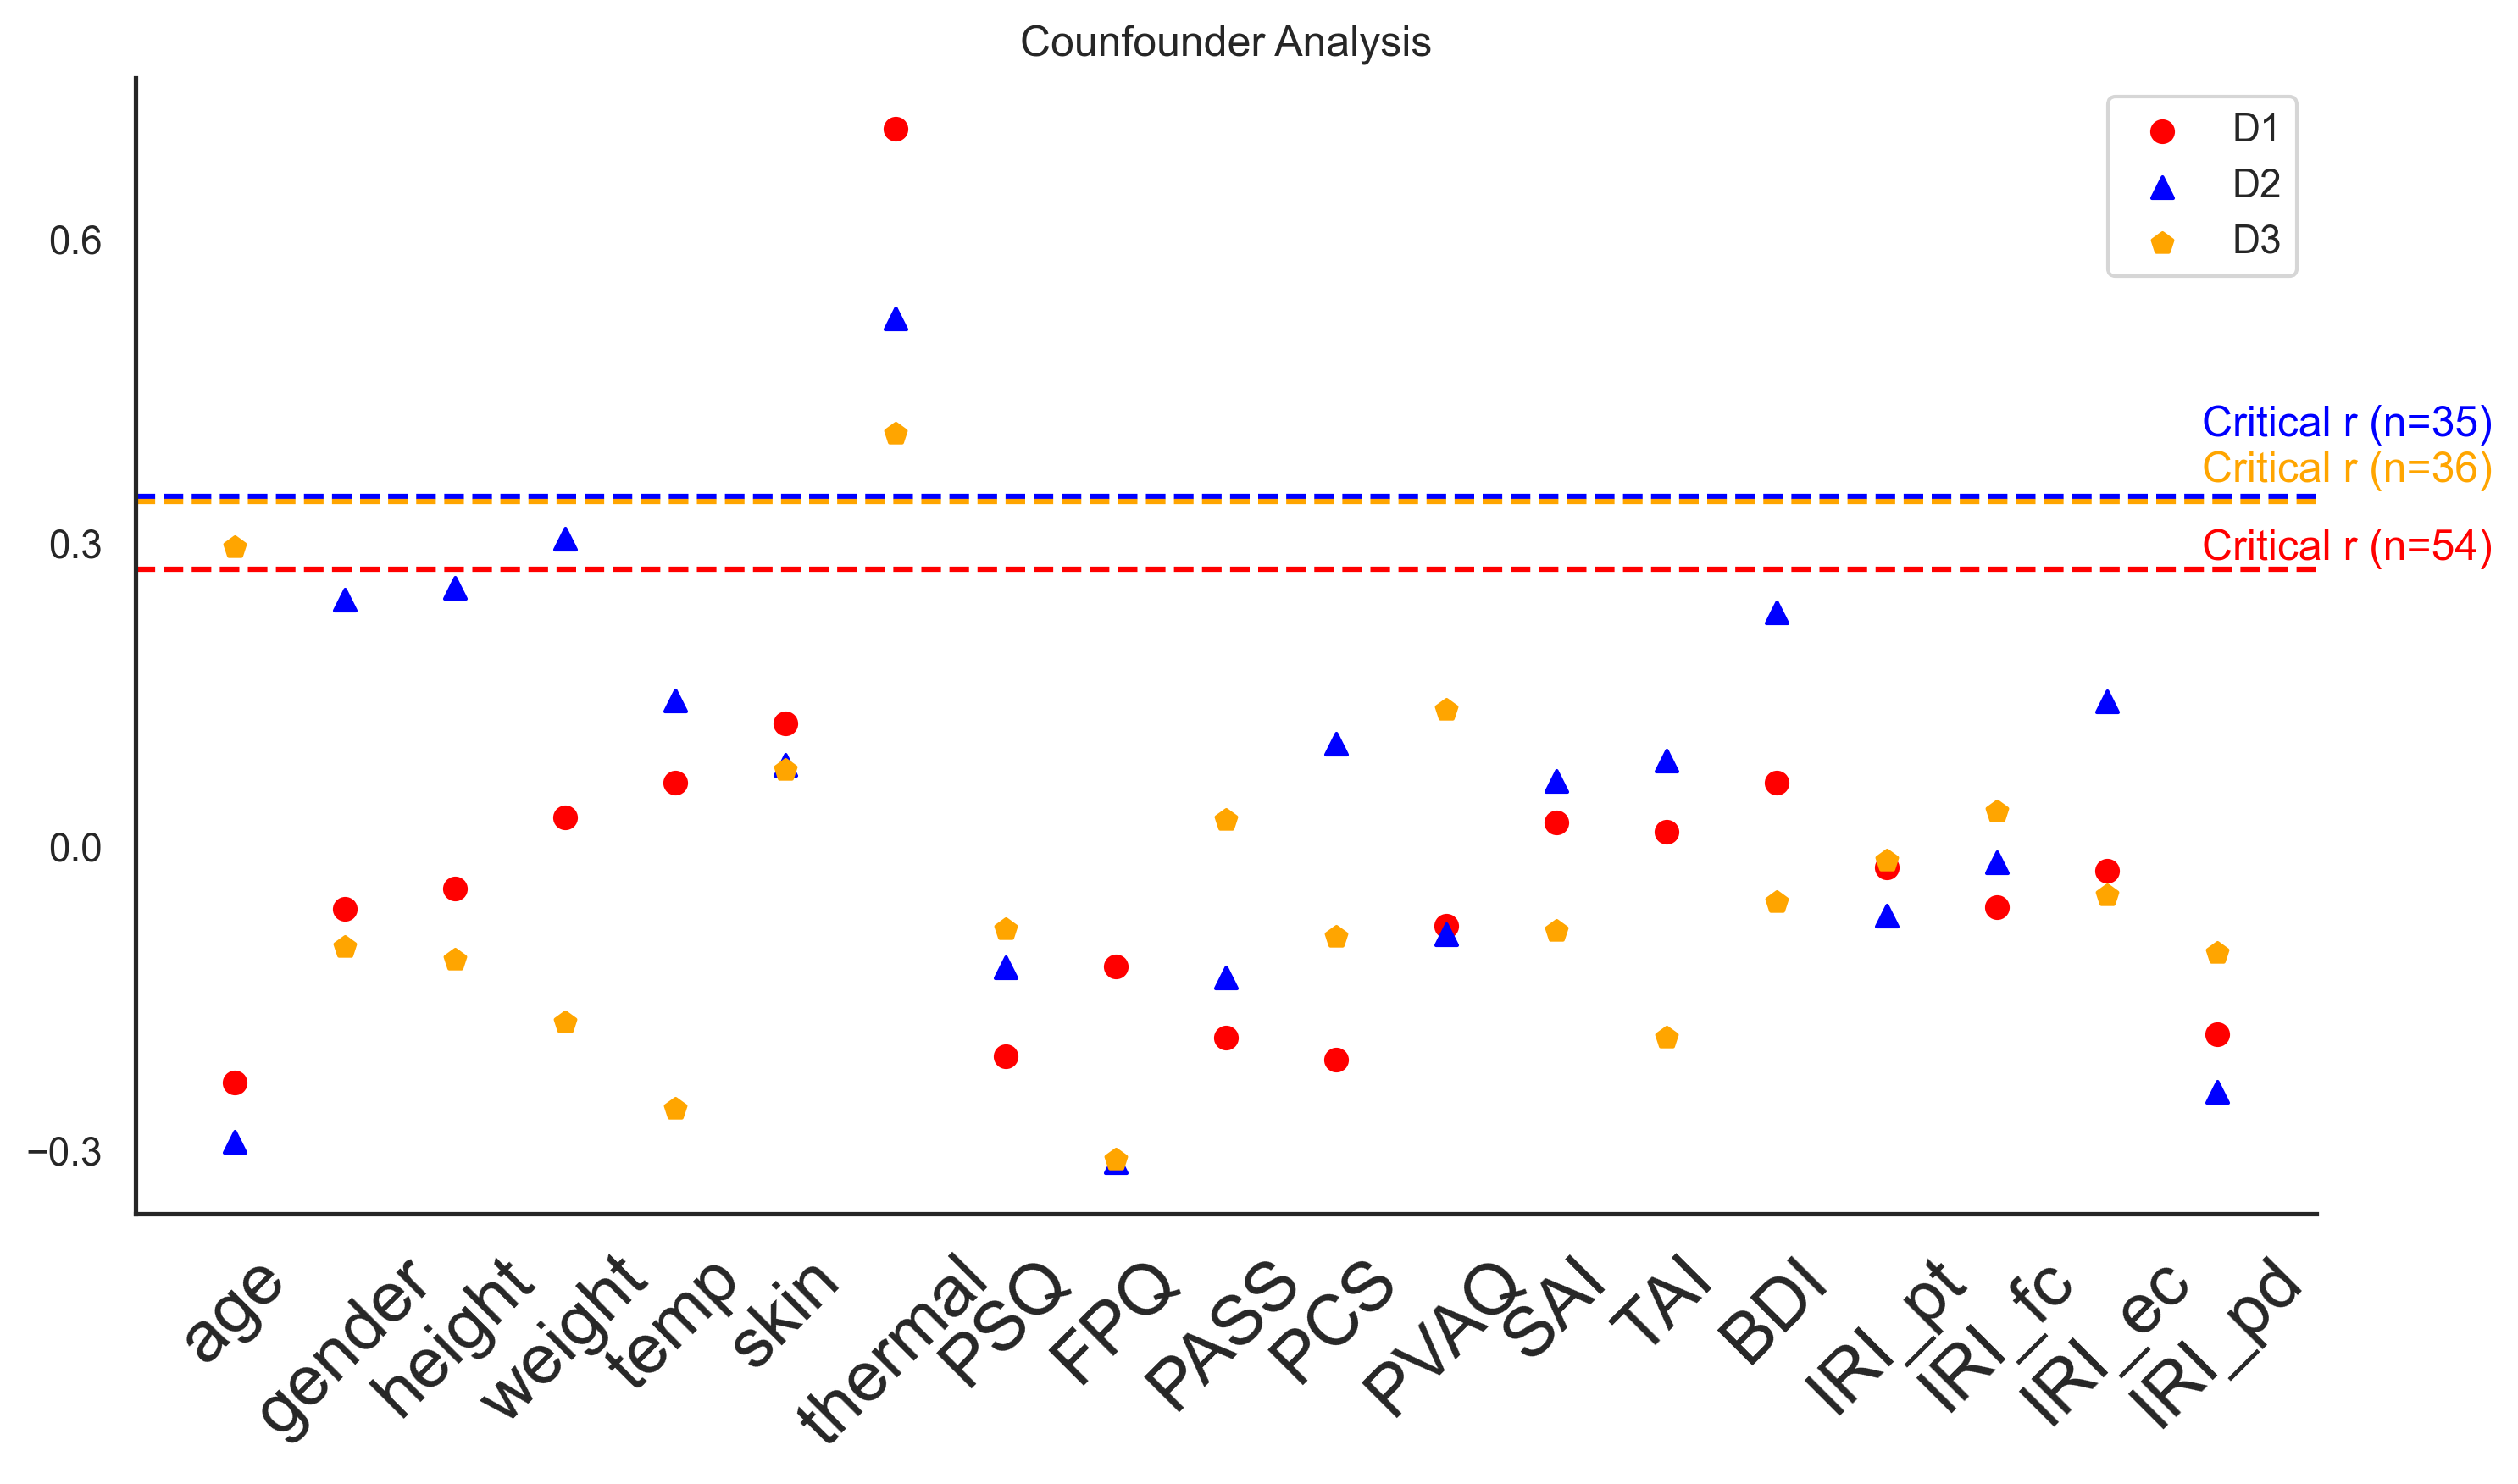

In [11]:
data = pd.read_csv('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/confounder_pr.csv')
# Filter the data by dataset
d1 = data[data['dataset'] == 'D1']
d2 = data[data['dataset'] == 'D2']
d3 = data[data['dataset'] == 'D3']

n_d1 = 54
n_d2 = 35
n_d3 = 36

# Calculating critical r values for p=0.05
r_d1 = 1.96 / np.sqrt(n_d1 - 3)
r_d2 = 1.96 / np.sqrt(n_d2 - 3)
r_d3 = 1.96 / np.sqrt(n_d3 - 3)

# # Sorting the D1 dataset by 'statis' in descending order to determine the order of the x-axis labels
# sorted_d1 = d1.sort_values(by='statis', ascending=False)

# # Creating a sorted list of 'mod' values based on the D1 sorted dataset
# sorted_mods = sorted_d1['mod'].tolist()

# # Reordering all datasets to align with the sorted 'mod' values from D1
# d1_sorted = d1.set_index('mod').loc[sorted_mods].reset_index()
# d2_sorted = d2.set_index('mod').reindex(sorted_mods).reset_index()
# d3_sorted = d3.set_index('mod').reindex(sorted_mods).reset_index()

# Create a new figure and axis for the plot with critical r-values
fig, ax = plt.subplots(figsize=(10, 6))

# Adding a helper to plot each dataset and its critical r line
def plot_dataset(ax, data, color, n, marker,label):
    # Scatter plot for the dataset
    ax.scatter(data['mod'], data['statis'], color=color,marker=marker, label=label)
    # Positive critical r-value
    ax.axhline(y=1.96 / np.sqrt(n - 3), color=color, linestyle='--')


# Plot each dataset with its corresponding subplot and critical r-values
plot_dataset(ax, d1, 'red', n_d1, 'o','D1')
plot_dataset(ax, d2, 'blue', n_d2, '^','D2')
plot_dataset(ax, d3, 'orange', n_d3, 'p','D3')
ax.text(20.5, 1.96 / np.sqrt(54 - 3), f'Critical r (n={n_d1})', verticalalignment='bottom', horizontalalignment='right', color='red')
ax.text(20.5, 1.96 / np.sqrt(35 - 3)+0.05, f'Critical r (n={n_d2})', verticalalignment='bottom', horizontalalignment='right', color='blue')
ax.text(20.5, 1.96 / np.sqrt(36 - 3)+0.01, f'Critical r (n={n_d3})', verticalalignment='bottom', horizontalalignment='right', color='orange')

ax.set_title(f'Counfounder Analysis')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(4))  # 在y轴上最多显示4个刻度

# Rotate x labels for better visibility
plt.xticks(rotation=45,fontsize=20)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels

plt.legend()
plt.show()


# task-based

In [12]:

model = joblib.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/model_D1.pkl')
featuremask = model['fsel'].get_support()
csps = model['model'].coef_
sublist = np.array(['S010','S011','S012','S015','S016','S018','S019','S020','S021','S022','S024','S025','S026','S027','S029','S030','S033','S034','S035','S037','S039','S041','S042','S043','S044','S045','S046','S047','S048','S049','S050','S051','S052','S053','S054','S055','S056','S057','S058'])
dfc_binned_data_pain = loadmat('/mnt/lxm2/2023/1itch/scripts/DCC/itch_exp_ts_39subs/dfc_binned_data_30bin_pain_all_ts.mat')['all_parts_dfc_binned_dat']
dfc_binned_data_itch = loadmat('/mnt/lxm2/2023/1itch/scripts/DCC/itch_exp_ts_39subs/dfc_binned_data_30bin_itch_all_ts.mat')['all_parts_dfc_binned_dat']
dfc_binned_data_con = loadmat('/mnt/lxm2/2023/1itch/scripts/DCC/itch_exp_ts_39subs/dfc_binned_data_30bin_con_all_ts.mat')['all_parts_dfc_binned_dat']
all_pain_df = []
for i in range(39):
    all_pain_df.append(dfc_binned_data_pain[0][i])
all_pain_df = np.stack(all_pain_df)
all_itch_df = []
for i in range(39):
    all_itch_df.append(dfc_binned_data_itch[0][i])
all_itch_df = np.stack(all_itch_df)
all_con_df = []
for i in range(39):
    all_con_df.append(dfc_binned_data_con[0][i])
all_con_df = np.stack(all_con_df)
all_con_dcc, all_pain_dcc, all_itch_dcc = [], [], []
for i in range(30):
    # all_con_dcc.append(model.predict(all_con_df[:,:,i]))
    # all_pain_dcc.append(model.predict(all_pain_df[:,:,i]))
    # all_itch_dcc.append(model.predict(all_itch_df[:,:,i]))
    all_con_dcc.append(np.dot(all_con_df[:,featuremask,:][:,:,i],csps))
    all_pain_dcc.append(np.dot(all_pain_df[:,featuremask,:][:,:,i],csps))
    all_itch_dcc.append(np.dot(all_itch_df[:,featuremask,:][:,:,i],csps))
all_con_dcc = np.stack(all_con_dcc)
all_pain_dcc = np.stack(all_pain_dcc)
all_itch_dcc = np.stack(all_itch_dcc)

/home/lxm/.conda/envs/mine39/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SelectKBest from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/lxm/.conda/envs/mine39/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RobustScaler from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/lxm/.conda/envs/mine39/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ElasticNet from version 1.3.0 when using version 1

In [13]:
del_i = []
for i in ['S042']:
    del_i.append([    np.where(sublist==i)[0][0]])
del_i = np.sort(np.stack(del_i).flatten())
data1 = np.delete(all_con_dcc.mean(axis=0),del_i).reshape(len(sublist)-len(del_i))
data2 = np.delete(all_pain_dcc.mean(axis=0),del_i).reshape(len(sublist)-len(del_i))
data3 = np.delete(all_itch_dcc.mean(axis=0),del_i).reshape(len(sublist)-len(del_i))

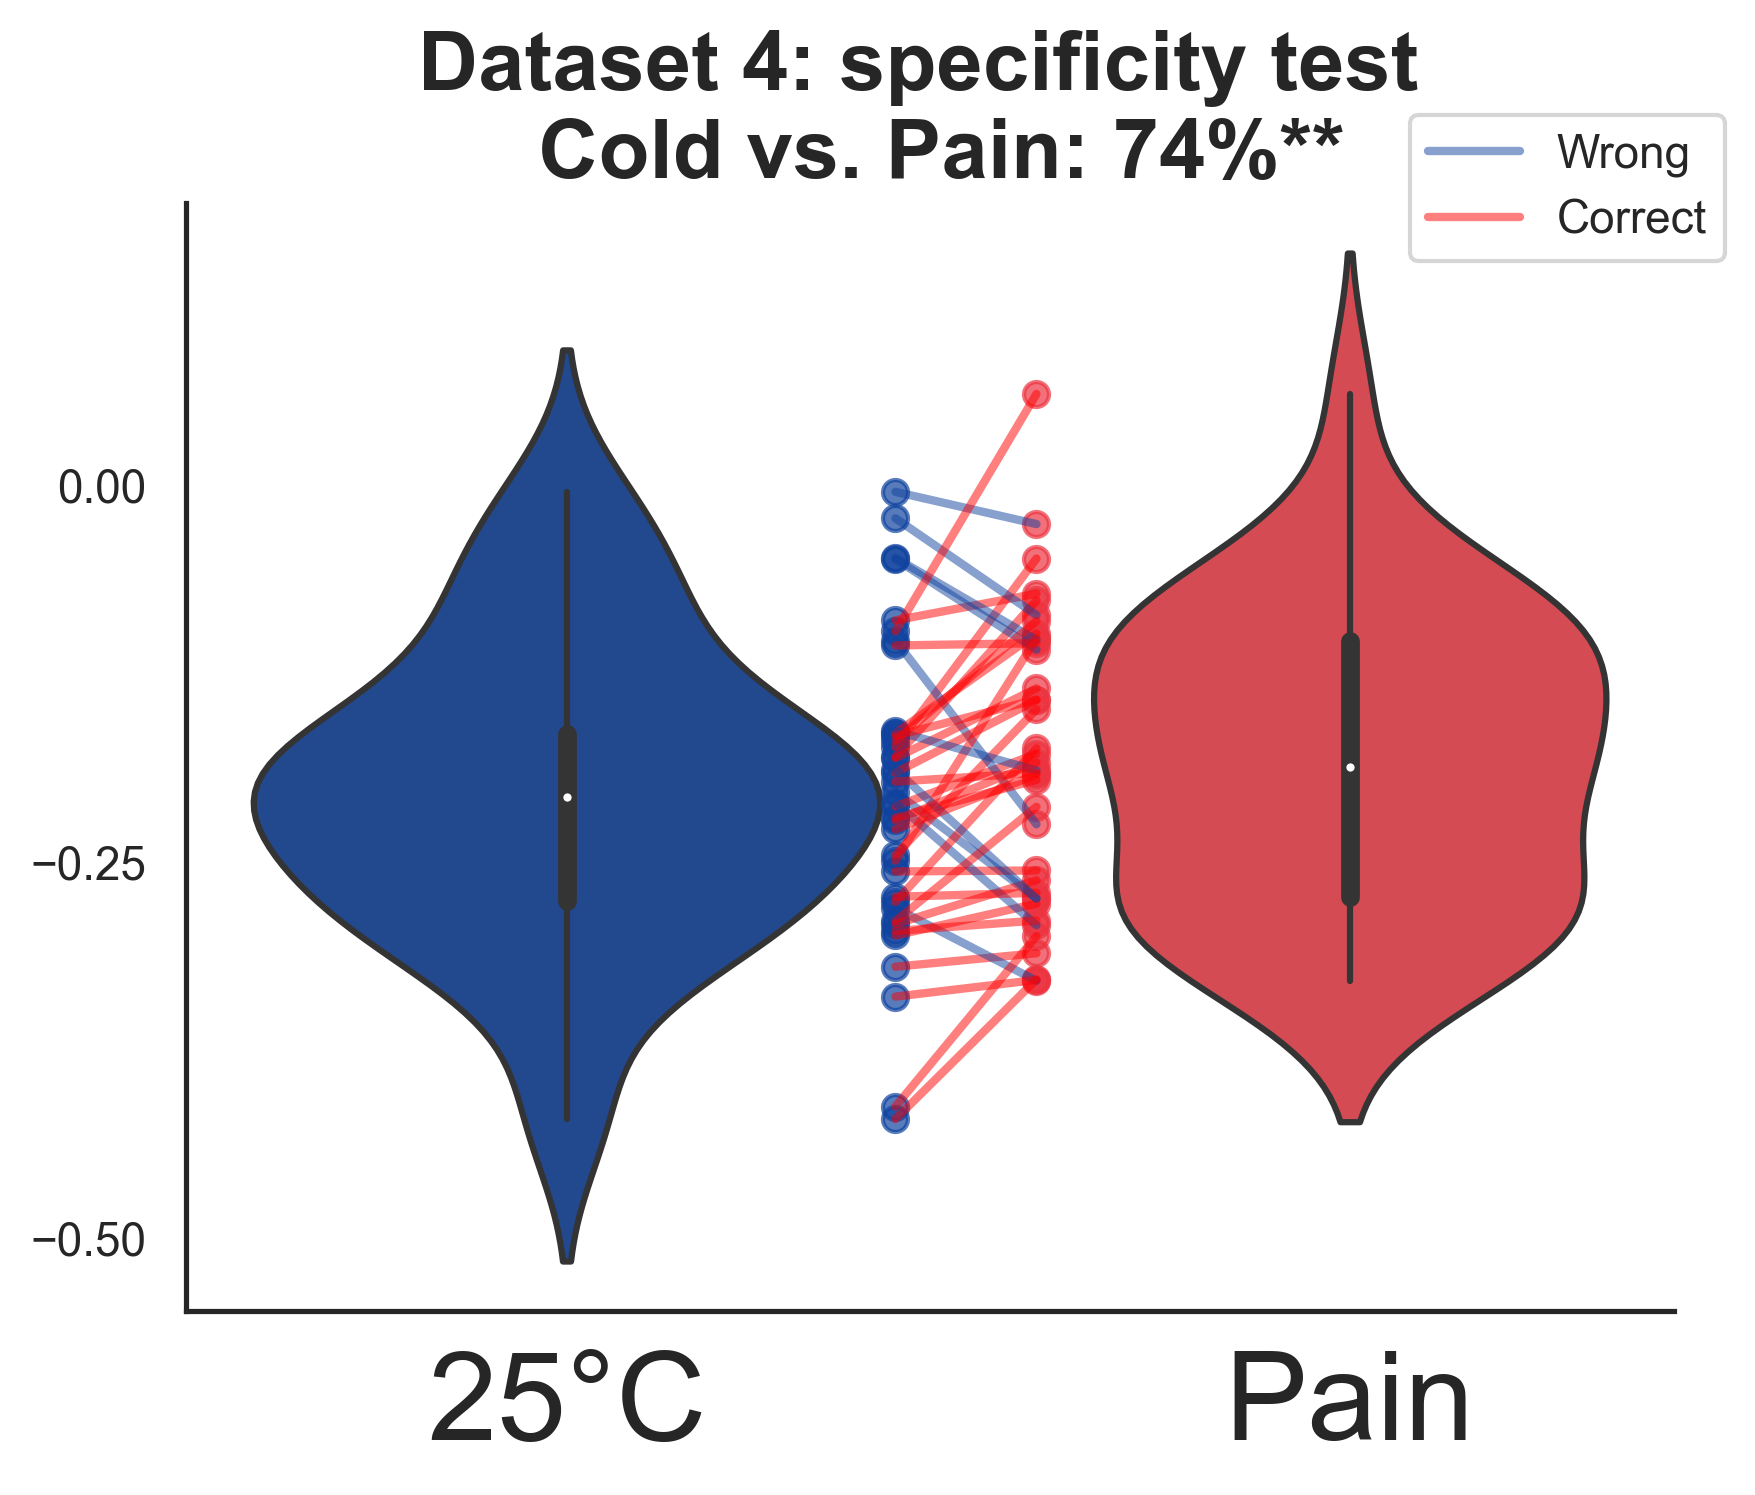

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
move_dis = 0.4
df = pd.DataFrame({'Group 1': data1, 'Group 2': data2})
fig,ax = plt.subplots()
# Plotting the violin plot
sns.violinplot(data=df, palette=['#10439F','#ec3440'],  linewidth=1.5,ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(3))  # 在x轴上最多显示5个刻度
ax.yaxis.set_major_locator(MaxNLocator(3))  # 在y轴上最多显示4个刻度

# Adding scatter plots
# Generate x-coordinates for the scatter plot for both groups
x1 = np.full(data1.shape, 0)+move_dis+0.02  # Positions for Group 1
x2 = np.full(data2.shape, 1)-move_dis  # Positions for Group 2

# Plotting the scatter points
plt.scatter(x1, data1, color='#10439F', alpha=0.7)
plt.scatter(x2, data2, color='#ec3440', alpha=0.7)

# Connecting lines
label1_flag,label2_flag = False,False
for i, (y1, y2) in enumerate(zip(data1, data2)):
    color = 'red' if i in np.where((data1<data2))[0] else '#10439F'
    label = 'Correct' if i in np.where((data1<data2))[0] else 'Wrong'
    if not label1_flag and label == 'Correct':
        # print(label)
        plt.plot([move_dis+0.02, 1-move_dis], [y1, y2], color=color, alpha=0.5, linewidth=2,label=label)
        label1_flag = True
    elif not label2_flag and label == 'Wrong':
        plt.plot([move_dis+0.02, 1-move_dis], [y1, y2], color=color, alpha=0.5, linewidth=2,label=label)
        label2_flag = True
    else:
        plt.plot([move_dis+0.02, 1-move_dis], [y1, y2], color=color, alpha=0.5, linewidth=2)

# Horizontal line at the threshold

# Adding titles and labels
plt.title('Dataset 4: specificity test \n Cold vs. Pain: 74%**',fontsize=20,fontweight='bold')
plt.xticks([0, 1], ['25°C', 'Pain'],fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1.1),)
# Show the plot
plt.show()
